# Reuters Dataset

**Classifying newswires:**

*   46 mutually exclusive topics
*   single-label & multi classes



# Loading Reuters Dataset

In [1]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

print(len(train_data))
print(len(test_data))
print(len(train_labels))

2121728/2110848 [==============================] - 0s 0us/step
8982
2246
8982


In [ ]:
train_data[0]

[1,
 2,
 2,
 8,
 43,
 10,
 447,
 5,
 25,
 207,
 270,
 5,
 3095,
 111,
 16,
 369,
 186,
 90,
 67,
 7,
 89,
 5,
 19,
 102,
 6,
 19,
 124,
 15,
 90,
 67,
 84,
 22,
 482,
 26,
 7,
 48,
 4,
 49,
 8,
 864,
 39,
 209,
 154,
 6,
 151,
 6,
 83,
 11,
 15,
 22,
 155,
 11,
 15,
 7,
 48,
 9,
 4579,
 1005,
 504,
 6,
 258,
 6,
 272,
 11,
 15,
 22,
 134,
 44,
 11,
 15,
 16,
 8,
 197,
 1245,
 90,
 67,
 52,
 29,
 209,
 30,
 32,
 132,
 6,
 109,
 15,
 17,
 12]

# Data Decoding

In [ ]:
word_ind = reuters.get_word_index()
#word_ind

In [ ]:
ind_word = {}
for (key,value) in word_ind.items():
  ind_word[value] = key
#ind_word

In [ ]:
#decoded_review = ' '.join(
#[ind_word.get(i - 3, '?') for i in train_data[0]])
#decoded_review 

m=[]
for i in train_data[0]:
  ok = ind_word.get(i-3,'?')
  m.append(ok)
join_words = ' '.join(m)

join_words

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

# Data Pre-Processing(Vectorization)

Data vectorization Function 

In [14]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):

  results = np.zeros((len(sequences), dimension))
  print("length of sequences:",len(sequences))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
    #print(results[i,sequence])

  return results


In [ ]:
test_data[0]

[1,
 4,
 1378,
 2025,
 9,
 697,
 4622,
 111,
 8,
 25,
 109,
 29,
 3650,
 11,
 150,
 244,
 364,
 33,
 30,
 30,
 1398,
 333,
 6,
 2,
 159,
 9,
 1084,
 363,
 13,
 2,
 71,
 9,
 2,
 71,
 117,
 4,
 225,
 78,
 206,
 10,
 9,
 1214,
 8,
 4,
 270,
 5,
 2,
 7,
 748,
 48,
 9,
 2,
 7,
 207,
 1451,
 966,
 1864,
 793,
 97,
 133,
 336,
 7,
 4,
 493,
 98,
 273,
 104,
 284,
 25,
 39,
 338,
 22,
 905,
 220,
 3465,
 644,
 59,
 20,
 6,
 119,
 61,
 11,
 15,
 58,
 579,
 26,
 10,
 67,
 7,
 4,
 738,
 98,
 43,
 88,
 333,
 722,
 12,
 20,
 6,
 19,
 746,
 35,
 15,
 10,
 9,
 1214,
 855,
 129,
 783,
 21,
 4,
 2280,
 244,
 364,
 51,
 16,
 299,
 452,
 16,
 515,
 4,
 99,
 29,
 5,
 4,
 364,
 281,
 48,
 10,
 9,
 1214,
 23,
 644,
 47,
 20,
 324,
 27,
 56,
 2,
 2,
 5,
 192,
 510,
 17,
 12]

In [15]:
x_train = vectorize_sequences(train_data)
x_test  = vectorize_sequences(test_data)
print("\n",x_train[0].shape)
x_train[0]

length of sequences: 8982
length of sequences: 2246

 (10000,)


array([0., 1., 1., ..., 0., 0., 0.])

In [ ]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

Labels vectorization

In [ ]:
#this is multi classiication problem so we instad use of below code for label vectorization 
#y_train = np.asarray(train_labels).astype('float32')
#y_test  = np.asarray(test_labels).astype('float32')

# multi classfication problem

#method1
#from keras.utils.np_utils import to_categorical
#one_hot_train_labels = to_categorical(train_labels)
#one_hot_test_labels = to_categorical(test_labels)


#methode2
#The only thing this approach would change is the choice of the loss function.
#With integer labels, you should use sparse_categorical_
#crossentropy
#y_train = np.array(train_labels)
#y_test = np.array(test_labels)


#method3
def vectorize_labels(labels, dimension=46):

  results = np.zeros((len(labels), dimension))
  #print("length of labels:",len(labels))
  for i, label in enumerate(labels):
    results[i, label] = 1.

  return results

In [ ]:
train_labels[0]

3

In [ ]:
y_train = vectorize_labels(train_labels)
y_test  = vectorize_labels(test_labels)

length of labels: 8982
length of labels: 2246


In [ ]:
y_train[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(60, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(50, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

setting aside the validation set

In [ ]:
x_val = x_train[:2000]
partial_x_train = x_train[2000:]
y_val = y_train[:2000]
partial_y_train = y_train[2000:]

In [ ]:
model_fit = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=5,
                    batch_size=512,
                    validation_data=(x_val, y_val))

results = model.evaluate(x_test, y_test)

Epoch 1/5
14/14 [==============================] - 1s 64ms/step - loss: 3.0813 - accuracy: 0.4038 - val_loss: 2.2091 - val_accuracy: 0.5900
Epoch 2/5
14/14 [==============================] - 1s 50ms/step - loss: 1.7210 - accuracy: 0.6713 - val_loss: 1.5311 - val_accuracy: 0.6835
Epoch 3/5
14/14 [==============================] - 1s 50ms/step - loss: 1.1993 - accuracy: 0.7569 - val_loss: 1.2918 - val_accuracy: 0.7295
Epoch 4/5
14/14 [==============================] - 1s 49ms/step - loss: 0.9354 - accuracy: 0.8087 - val_loss: 1.1857 - val_accuracy: 0.7390
Epoch 5/5
71/71 [==============================] - 0s 3ms/step - loss: 1.1039 - accuracy: 0.7605


In [ ]:
history_dic = model_fit.history
history_dic.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

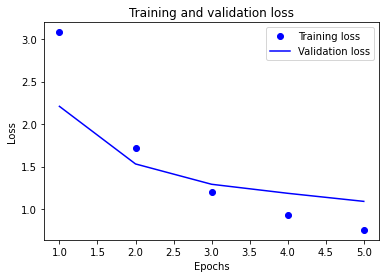

In [ ]:
import matplotlib.pyplot as plt
loss_values     = history_dic['loss']
val_loss_values = history_dic['val_loss']
acc             = history_dic['accuracy']

epochs = range(1, len(acc) + 1)


plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

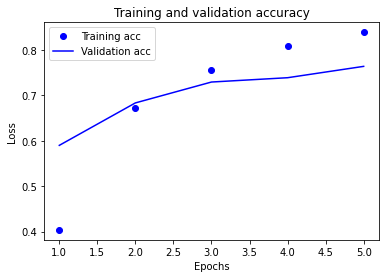

In [ ]:
plt.clf()

plt.plot(epochs, history_dic['accuracy'], 'bo', label='Training acc')
plt.plot(epochs,  history_dic['val_accuracy'], 'b', label='Validation acc')


plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
results = model.evaluate(x_test, y_test)
results

71/71 [==============================] - 0s 3ms/step - loss: 1.1039 - accuracy: 0.7605


[1.1039472818374634, 0.7604630589485168]

Model. predict passes the input vector through the model and returns the output tensor for each datapoint. Since the last layer in your model is a single Dense neuron, the output for any datapoint is a single value.

In [ ]:
prediction=model.predict(x_test)
prediction
len(prediction)

2246

In [ ]:
prediction[0]
len(prediction[0])

46

In [ ]:
np.argmax(prediction[0])

3